In [3]:
%matplotlib inline


# Fitting an image and points

In this example, we will fit a cross onto the same cross, but rotated. We will take advantage of this knowledge and use a rotation deformation module. We will also add some noise on the initial center guess to show how to fit the geometrical descriptors. In addition to images, we add points at the extremity of each branch that will also get matched in order to illustrate multi deformables matching. This also helps the fitting process by adding more information to the model.




Import relevant modules.




In [4]:
import sys
sys.path.append("../")

import math

import torch
import matplotlib.pyplot as plt
import scipy.ndimage

import imodal

imodal.Utilities.set_compute_backend('torch')

Load image data and generate dots.




In [5]:
pwd

'/home/gris/algos/implicitmodules/script'

In [6]:
source_image = imodal.Utilities.load_greyscale_image("../data/images/heart_a.png", origin='lower')
target_image = imodal.Utilities.load_greyscale_image("../data/images/heart_b.png", origin='lower')

# Smoothing
sig_smooth = 0.
source_image = torch.tensor(scipy.ndimage.gaussian_filter(source_image, sig_smooth))
target_image = torch.tensor(scipy.ndimage.gaussian_filter(target_image, sig_smooth))

extent_length = 31.
extent = imodal.Utilities.AABB(0., extent_length, 0., extent_length)

Plot everything.




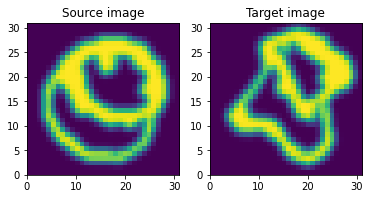

In [7]:
plt.subplot(1, 2, 1)
plt.title("Source image")
plt.imshow(source_image, origin='lower', extent=extent.totuple())

plt.subplot(1, 2, 2)
plt.title("Target image")
plt.imshow(target_image, origin='lower', extent=extent.totuple())

plt.show()

In [11]:
points_translation = imodal.Utilities.grid2vec(*torch.meshgrid([torch.linspace(0., 30., 10), torch.linspace(0., 30., 10)]))
sigma_translation = 5.
translation = imodal.DeformationModules.ImplicitModule0(2, points_translation.shape[0], sigma_translation, nu=1e-4, gd=points_translation)

In [12]:
source_deformable = imodal.Models.DeformableImage(source_image, output='bitmap', extent='match', backward=False)
source_deformable2 = imodal.Models.DeformableImage(source_image, output='bitmap', extent='match', backward=True)
target_deformable = imodal.Models.DeformableImage(target_image, output='bitmap', extent='match', backward=False)

attachment = imodal.Attachment.L2NormAttachment(transform=None)

model = imodal.Models.RegistrationModel([source_deformable2], [translation], [attachment], fit_gd=[True], lam=1000.)

Fit the model.




In [13]:
shoot_solver = 'rk4'
shoot_it = 10
max_it = 3

costs = {}
fitter = imodal.Models.Fitter(model, optimizer='torch_lbfgs')

fitter.fit([target_deformable], max_it, costs=costs, options={'shoot_solver': shoot_solver, 'shoot_it': shoot_it, 'line_search_fn': 'strong_wolfe'})

Starting optimization with method torch LBFGS, using solver rk4 with 10 iterations.
Initial cost={'deformation': 0.0, 'attach': 180737.28125}
1e-10
Evaluated model with costs=180737.28125
Evaluated model with costs=175638.46695511043
Evaluated model with costs=168119.1949710846
Evaluated model with costs=134716.61659908295
Evaluated model with costs=98821.84629440308
Evaluated model with costs=84609.31463623047
Evaluated model with costs=68632.33563232422
Evaluated model with costs=63153.88652420044
Evaluated model with costs=58276.13864898682
Evaluated model with costs=99419.8325958252
Evaluated model with costs=54336.566833496094
Evaluated model with costs=52112.24223327637
Evaluated model with costs=50518.08457946777
Evaluated model with costs=48901.26368713379
Evaluated model with costs=46911.322204589844
Evaluated model with costs=49070.58667755127
Evaluated model with costs=46231.92623901367
Evaluated model with costs=48058.09696960449
Evaluated model with costs=45734.10503387451

(0.0, 31.0, 0.0, 31.0)

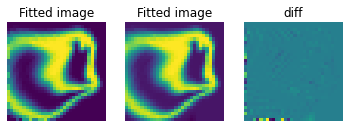

In [14]:
source_deformable = imodal.Models.DeformableImage(source_image, output='bitmap', extent='match', backward=False)
source_deformable2 = imodal.Models.DeformableImage(source_image, output='bitmap', extent='match', backward=True)

defo = imodal.Models.deformables_compute_deformed([source_deformable, source_deformable2], model.modules, shoot_solver, shoot_it)
deformed_image = defo[0][0].detach().view_as(source_image)
deformed_image2 = defo[1][0].detach().view_as(source_image)

plt.subplot(1, 3, 1)
plt.title("Fitted image")
plt.imshow(deformed_image.numpy(), origin='lower', extent=extent.totuple())
plt.axis('off')
plt.subplot(1, 3, 2)
plt.title("Fitted image")
plt.imshow(deformed_image2.numpy(), origin='lower', extent=extent.totuple())
plt.axis('off')
plt.subplot(1, 3, 3)
plt.title("diff")
plt.imshow(deformed_image.numpy() -deformed_image2.numpy(), origin='lower', extent=extent.totuple())
plt.axis('off')

(0.0, 31.0, 0.0, 31.0)

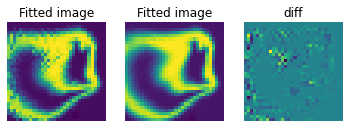

In [13]:
source_deformable = imodal.Models.DeformableImage(source_image, output='bitmap', extent='match', backward=False)
source_deformable2 = imodal.Models.DeformableImage(source_image, output='bitmap', extent='match', backward=True)

defo = imodal.Models.deformables_compute_deformed([source_deformable, source_deformable2], model.modules, shoot_solver, shoot_it)
deformed_image = defo[0][0].detach().view_as(source_image)
deformed_image2 = defo[1][0].detach().view_as(source_image)

plt.subplot(1, 3, 1)
plt.title("Fitted image")
plt.imshow(deformed_image.numpy(), origin='lower', extent=extent.totuple())
plt.axis('off')
plt.subplot(1, 3, 2)
plt.title("Fitted image")
plt.imshow(deformed_image2.numpy(), origin='lower', extent=extent.totuple())
plt.axis('off')
plt.subplot(1, 3, 3)
plt.title("diff")
plt.imshow(deformed_image.numpy() -deformed_image2.numpy(), origin='lower', extent=extent.totuple())
plt.axis('off')

In [12]:
shoot_solver = 'rk4'
shoot_it = 10
max_it = 3

costs = {}
fitter = imodal.Models.Fitter(model, optimizer='torch_lbfgs')

fitter.fit([target_deformable], max_it, costs=costs, options={'shoot_solver': shoot_solver, 'shoot_it': shoot_it, 'line_search_fn': 'strong_wolfe'})

Starting optimization with method torch LBFGS, using solver rk4 with 10 iterations.
Initial cost={'deformation': 0.0, 'attach': 180737.28125}
1e-10
Evaluated model with costs=180737.28125
Evaluated model with costs=175638.46695511043
Evaluated model with costs=168119.1949710846
Evaluated model with costs=134716.61659908295
Evaluated model with costs=98821.84629440308
Evaluated model with costs=84609.31463623047
Evaluated model with costs=68632.33563232422
Evaluated model with costs=63153.88652420044
Evaluated model with costs=58276.13864898682
Evaluated model with costs=99419.8325958252
Evaluated model with costs=54336.566833496094
Evaluated model with costs=52112.24223327637
Evaluated model with costs=50518.08457946777
Evaluated model with costs=48901.26368713379
Evaluated model with costs=46911.322204589844
Evaluated model with costs=49070.58667755127
Evaluated model with costs=46231.92623901367
Evaluated model with costs=48058.09696960449
Evaluated model with costs=45734.10503387451

(0.0, 31.0, 0.0, 31.0)

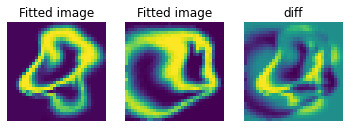

In [9]:
intermediates = {}
with torch.autograd.no_grad():
    model.deformables[0].output = 'bitmap'
    deformed = model.compute_deformed(shoot_solver, shoot_it, intermediates=intermediates)

    deformed_image = deformed[0][0].view_as(source_image)

    #deformed_image2 = deformed[1][0].view_as(source_image)

plt.subplot(1, 3, 1)
plt.title("Fitted image")
plt.imshow(deformed_image.numpy(), origin='lower', extent=extent.totuple())
plt.axis('off')
plt.subplot(1, 3, 2)
plt.title("Fitted image")
plt.imshow(deformed_image2.numpy(), origin='lower', extent=extent.totuple())
plt.axis('off')
plt.subplot(1, 3, 3)
plt.title("diff")
plt.imshow(deformed_image.numpy() -deformed_image2.numpy(), origin='lower', extent=extent.totuple())
plt.axis('off')

In [8]:
shoot_solver = 'rk4'
shoot_it = 10
max_it = 100

costs = {}
fitter = imodal.Models.Fitter(model, optimizer='torch_lbfgs')

fitter.fit([target_deformable], max_it, costs=costs, options={'shoot_solver': shoot_solver, 'shoot_it': shoot_it, 'line_search_fn': 'strong_wolfe'})

Starting optimization with method torch LBFGS, using solver rk4 with 10 iterations.
Initial cost={'deformation': 0.0, 'attach': 180737.28125}
1e-10
Evaluated model with costs=180737.28125
Evaluated model with costs=175638.46695511043
Evaluated model with costs=168119.1949710846
Evaluated model with costs=134716.61659908295
Evaluated model with costs=98821.84629440308
Evaluated model with costs=84609.31463623047
Evaluated model with costs=68632.33563232422
Evaluated model with costs=63153.88652420044
Evaluated model with costs=58276.13864898682
Evaluated model with costs=99419.8325958252
Evaluated model with costs=54336.566833496094
Evaluated model with costs=52112.24223327637
Evaluated model with costs=50518.08457946777
Evaluated model with costs=48901.26368713379
Evaluated model with costs=46911.322204589844
Evaluated model with costs=49070.58667755127
Evaluated model with costs=46231.92623901367
Evaluated model with costs=48058.09696960449
Evaluated model with costs=45734.10503387451

KeyboardInterrupt: 

(0.0, 31.0, 0.0, 31.0)

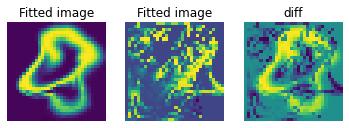

In [11]:
intermediates = {}
with torch.autograd.no_grad():
    model.deformables[0].output = 'bitmap'
    deformed = model.compute_deformed(shoot_solver, shoot_it, intermediates=intermediates)

    deformed_image = deformed[0][0].view_as(source_image)

    #deformed_image2 = deformed[1][0].view_as(source_image)
defo = imodal.Models.deformables_compute_deformed([source_deformable], model.modules, shoot_solver, shoot_it)
deformed_image2 = defo[0][0].detach().view_as(source_image)

plt.subplot(1, 3, 1)
plt.title("Fitted image")
plt.imshow(deformed_image.numpy(), origin='lower', extent=extent.totuple())
plt.axis('off')
plt.subplot(1, 3, 2)
plt.title("Fitted image")
plt.imshow(deformed_image2.numpy(), origin='lower', extent=extent.totuple())
plt.axis('off')
plt.subplot(1, 3, 3)
plt.title("diff")
plt.imshow(deformed_image.numpy() -deformed_image2.numpy(), origin='lower', extent=extent.totuple())
plt.axis('off')

In [2]:
defo = imodal.Models.deformables_compute_deformed([source_deformable], model.modules, shoot_solver, shoot_it)
defo = defo[0].view_as(source_image)

plt.subplot(1, 3, 1)
plt.title("Fitted image")
plt.imshow(defo.numpy(), origin='lower', extent=extent.totuple())
plt.axis('off')

NameError: name 'imodal' is not defined

In [13]:
shoot_solver = 'rk4'
shoot_it = 10
max_it = 100

costs = {}
fitter = imodal.Models.Fitter(model, optimizer='torch_lbfgs')

fitter.fit([target_deformable, target_deformable], max_it, costs=costs, options={'shoot_solver': shoot_solver, 'shoot_it': shoot_it, 'line_search_fn': 'strong_wolfe'})

Starting optimization with method torch LBFGS, using solver rk4 with 10 iterations.
Initial cost={'deformation': 0.0, 'attach': 361474.5625}
1e-10
Evaluated model with costs=361474.5625
Evaluated model with costs=351275.42016204074
Evaluated model with costs=336249.570333302
Evaluated model with costs=269600.6321153641
Evaluated model with costs=197770.54350280762
Evaluated model with costs=172845.55683898926
Evaluated model with costs=138195.7702484131
Evaluated model with costs=128129.79029846191
Evaluated model with costs=118936.36074829102
Evaluated model with costs=112220.68919372559
Evaluated model with costs=105702.81188964844
Evaluated model with costs=105639.53703308105
Evaluated model with costs=102160.65912628174
Evaluated model with costs=98255.17777252197
Evaluated model with costs=95564.9845123291
Evaluated model with costs=94618.29063415527
Evaluated model with costs=94240.12414550781
Evaluated model with costs=90892.13088989258
Evaluated model with costs=90271.661849975

Evaluated model with costs=30998.249877929688
Evaluated model with costs=30994.1220703125
Evaluated model with costs=30994.075744628906
Evaluated model with costs=30993.17626953125
Evaluated model with costs=30993.112060546875
Evaluated model with costs=30992.260498046875
Evaluated model with costs=30992.20816040039
Evaluated model with costs=31158.075225830078
Evaluated model with costs=30992.21221923828
Evaluated model with costs=30992.204223632812
Evaluated model with costs=30992.219970703125
Time: 430.6252702229999
Iteration: 5
Costs
deformation=352.048095703125
attach=30640.171875
Total cost=30992.219970703125
1e-10
Evaluated model with costs=30992.204223632812
Evaluated model with costs=31128.886993408203
Evaluated model with costs=31020.174926757812
Evaluated model with costs=31073.855041503906
Evaluated model with costs=30985.900451660156
Evaluated model with costs=31009.82391357422
Evaluated model with costs=30985.623962402344
Evaluated model with costs=30985.034118652344
Eval

KeyboardInterrupt: 

Compute the final deformed source and plot it.




(0.0, 31.0, 0.0, 31.0)

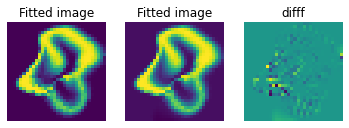

In [16]:
intermediates = {}
with torch.autograd.no_grad():
    model.deformables[0].output = 'bitmap'
    deformed = model.compute_deformed(shoot_solver, shoot_it, intermediates=intermediates)

    deformed_image = deformed[0][0].view_as(source_image)

    deformed_image2 = deformed[1][0].view_as(source_image)

plt.subplot(1, 3, 1)
plt.title("Fitted image")
plt.imshow(deformed_image.numpy(), origin='lower', extent=extent.totuple())
plt.axis('off')
plt.subplot(1, 3, 2)
plt.title("Fitted image")
plt.imshow(deformed_image2.numpy(), origin='lower', extent=extent.totuple())
plt.axis('off')
plt.subplot(1, 3, 3)
plt.title("diff")
plt.imshow(deformed_image.numpy() -deformed_image2.numpy(), origin='lower', extent=extent.totuple())
plt.axis('off')